In [57]:
import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import TensorBoard
import datetime
import numpy as np

In [58]:
# Create a TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")  # Adjust the log directory as needed
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [59]:
TRAINING_DIR = '/SEMESTER5/Tugas2/data/train'
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)
  # Normalize pixel values between 0 and 1

# Load training data
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=35,
    class_mode='binary'
    )

        
VALIDATION_DIR = '/SEMESTER5/Tugas2/data/train'
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values between 0 and 1

# Load validation data
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(150, 150),  # Resize images to 150x150
batch_size=35,
class_mode='binary')

Found 2160 images belonging to 3 classes.
Found 2160 images belonging to 3 classes.


In [60]:
model = tf.keras.models.Sequential([

    # Convolutional Layers
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', 
                           input_shape=(150, 150, 3)), # 3 = RGB
    tf.keras.layers.MaxPooling2D(2, 2), # Pooling Layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), # Pooling Layer
   
    # from 2D to 1D (Flatten)
    tf.keras.layers.Flatten(),
   
    # Fully Connected Layers
    tf.keras.layers.Dense(128, activation='relu'),

    # Output Layer (airplane, car, dan motorbike) Berarti hanya 3 kelas
    tf.keras.layers.Dense(8, activation='softmax')
    ])

In [68]:
# Menampilkan ringkasan struktur model
model.summary()

# Mendapatkan jumlah hidden layers
hidden_layers_count = len(model.layers) - 2  # Mengurangkan input dan output layers

# Menampilkan jumlah hidden layers
print("Jumlah Hidden Layers:", hidden_layers_count)

# # Count the total number of hidden nodes
# total_hidden_nodes = 0
# for layer in model.layers:
#     if type(layer) == tf.keras.layers.Dense:
#         total_hidden_nodes += layer.units
# print("Total number of hidden nodes:", total_hidden_nodes)

# Count the total number of weights
total_weights = 0
for layer in model.layers:
    total_weights += layer.count_params()

print("Total number of weights:", total_weights)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 41472)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [18]:
# Compile a Model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
    )   

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    verbose=2,
    validation_data=validation_generator,
    callbacks=[tensorboard_callback]
    )

Epoch 1/10
62/62 - 38s - loss: 0.7459 - accuracy: 0.7421 - val_loss: 0.1132 - val_accuracy: 0.9616 - 38s/epoch - 617ms/step
Epoch 2/10
62/62 - 35s - loss: 0.1434 - accuracy: 0.9477 - val_loss: 0.0689 - val_accuracy: 0.9745 - 35s/epoch - 571ms/step
Epoch 3/10
62/62 - 33s - loss: 0.1180 - accuracy: 0.9574 - val_loss: 0.0588 - val_accuracy: 0.9815 - 33s/epoch - 536ms/step
Epoch 4/10
62/62 - 32s - loss: 0.0744 - accuracy: 0.9759 - val_loss: 0.0443 - val_accuracy: 0.9884 - 32s/epoch - 514ms/step
Epoch 5/10
62/62 - 34s - loss: 0.0645 - accuracy: 0.9782 - val_loss: 0.0437 - val_accuracy: 0.9861 - 34s/epoch - 544ms/step
Epoch 6/10
62/62 - 35s - loss: 0.0621 - accuracy: 0.9787 - val_loss: 0.0238 - val_accuracy: 0.9931 - 35s/epoch - 557ms/step
Epoch 7/10
62/62 - 34s - loss: 0.0487 - accuracy: 0.9847 - val_loss: 0.0500 - val_accuracy: 0.9806 - 34s/epoch - 554ms/step
Epoch 8/10
62/62 - 35s - loss: 0.0412 - accuracy: 0.9847 - val_loss: 0.0248 - val_accuracy: 0.9917 - 35s/epoch - 562ms/step
Epoch 9/

In [19]:
# Save the model to a file
model.save('model_vehicle.h5')

c:\Users\MARLINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
# Load the saved model
load_model = tf.keras.models.load_model('model_vehicle.h5')

In [21]:

# Evaluate the loaded model with test data
test_loss, test_acc = load_model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

62/62 [==============================] - 7s 106ms/step - loss: 0.0414 - accuracy: 0.9866
Test accuracy: 0.9865740537643433


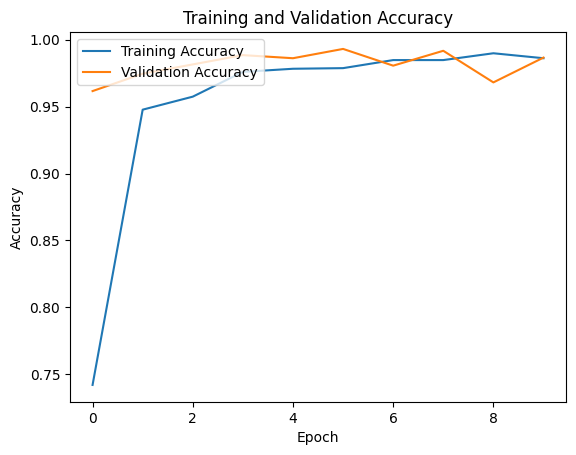

In [23]:
import matplotlib.pyplot as plt

# Retrieve a list of list results on training and test data sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation accuracy per epoch
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Specify the directory and filename for saving the plot
save_dir = '/SEMESTER5/Tugas2'  # Change to your desired directory
save_filename = 'train_test_plot_vehicle.png'  # Change to your desired filename

# Save the plot to the specified directory and filename
plt.savefig(os.path.join(save_dir, save_filename))

# Display the plot (optional)
plt.show()


In [25]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np

# Load your trained model (ensure the path is correct)
model_path = '/SEMESTER5/Tugas2/model_vehicle.h5'
loaded_model = load_model(model_path)

# Define class labels
class_labels = {0: 'airplane', 1: 'car', 2: 'motorcycle'}

def predict_image_class(image_path, model):
    img = image.load_img(image_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    classes = model.predict(x)
    predicted_class = np.argmax(classes)
    return class_labels[predicted_class], classes[0][predicted_class]

def upload_and_predict():
    image_path = input("Enter the file path of the image: ")
    predicted_class, confidence = predict_image_class(image_path, loaded_model)
    print(f"The image is predicted as a {predicted_class} with confidence: {confidence:.2%}.")

# Perform the image upload and prediction
upload_and_predict()


1/1 [==============================] - 0s 84ms/step
The image is predicted as a car with confidence: 100.00%.
